In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
# This handy script will let me show multiple variable outputs from a cell without having to do a print statement,
# which is nice while looking at individual cells while writing. I've disabled it now that I no longer need it,
# but I'm leaving the code here so I have it for reference for later assignments.

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouseDF = pd.read_csv(mouse_drug_data_to_load)
trialDF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

# mergedDF = pd.merge(mouseDF, trialDF, on = "Mouse ID")
mergedDF = pd.merge(trialDF, mouseDF, on = "Mouse ID")
# mergedDF = mergedDF.sort_values("Tumor Volume (mm3)", ascending = False)
mergedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mdf = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].agg(["mean"]))
# mdf = mdf.unstack() -- this will pivot the table

# Grabbing the indices for a new table
s1 = pd.Series(mdf.index.get_level_values('Drug'))
s2 = pd.Series(mdf.index.get_level_values('Timepoint'))

# New table with series attached
mdf = mdf.assign(D=s1.values)
mdf = mdf.assign(TP=s2.values)
 
# Replace index with numerical, rename columns, and re-order them
mdf.reset_index(drop = True, inplace = True)
mdf = mdf[["D", "TP", "mean"]]
mdf.rename(columns = {"D": "Drug", "TP": "Timepoint", "mean": "Tumor Volume (mm3)"}, inplace = True)

# Rename DF

mean_tumor_volDF = mdf
mean_tumor_volDF.head()


# mdf.columns

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
mdf = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"], as_index = False)["Tumor Volume (mm3)"].agg(["mean"]))

mdf.head()
mdf = mdf.reset_index()
mdf.rename(columns = {"mean": "Tumor Volume (mm3)"}, inplace = True)
mdf.columns
mdf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Std_Err_Tumor_Vol_df = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].agg(["sem"]))

# Rename column
Std_Err_Tumor_Vol_df = Std_Err_Tumor_Vol_df.rename(columns = {"sem": "Tumor Volume (mm3)"})

# Preview DataFrame
Std_Err_Tumor_Vol_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Nice quick way to pivot
table2 = pd.pivot_table(mergedDF, values='Tumor Volume (mm3)', index=['Timepoint'], 
                       columns = ["Drug"], aggfunc=np.mean)
table2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
# Create temporary table from which to grab individual drug stats

tempdf = pd.merge(mean_tumor_volDF, Std_Err_Tumor_Vol_df, on = "Drug")
tempdf = tempdf.rename(columns = {"Tumor Volume (mm3)_x": "Tumor Vol", "Tumor Volume (mm3)_y": "Standard Error"})

tempdf.head()

,Drug,Timepoint,Tumor Vol,Standard Error
0,Capomulin,0,45.0,0.000000
1,Capomulin,0,45.0,0.448593
2,Capomulin,0,45.0,0.702684
3,Capomulin,0,45.0,0.838617
4,Capomulin,0,45.0,0.909731


In [9]:
# Separating x, y, and error values for the three drugs and placebo

# Capomulin

cap_temp = pd.DataFrame(tempdf.loc[tempdf["Drug"] == "Capomulin"])
cap_x = cap_temp["Timepoint"]
cap_mean = cap_temp["Tumor Vol"]
cap_SE = cap_temp["Standard Error"]

# Infubinol

inf_temp = pd.DataFrame(tempdf.loc[tempdf["Drug"] == "Infubinol"])
inf_x = inf_temp["Timepoint"]
inf_mean = inf_temp["Tumor Vol"]
inf_SE = inf_temp["Standard Error"]

# Ketapril

ket_temp = pd.DataFrame(tempdf.loc[tempdf["Drug"] == "Ketapril"])
ket_x = ket_temp["Timepoint"]
ket_mean = ket_temp["Tumor Vol"]
ket_SE = ket_temp["Standard Error"]

# Placebo

plac_temp = pd.DataFrame(tempdf.loc[tempdf["Drug"] == "Placebo"])
plac_x = plac_temp["Timepoint"]
plac_mean = plac_temp["Tumor Vol"]
plac_SE = plac_temp["Standard Error"]

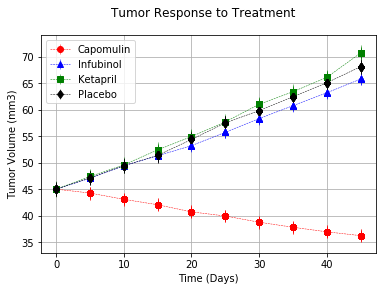

In [10]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

# Adding grid
ax.grid(fillstyle = 'none')


# Our four plots with x as time, y as mean, and error bar as standard error

ax.errorbar(cap_x, cap_mean, cap_SE, fmt="o", linewidth = 0.5, linestyle='dashed',
            color = "red", label = "Capomulin")
ax.errorbar(inf_x, inf_mean, inf_SE, c = "blue", marker = "^", linewidth = 0.5,
            linestyle='dashed', label = "Infubinol")
ax.errorbar(ket_x, ket_mean, ket_SE, c = "green", marker = "s", linewidth = 0.5,
            linestyle='dashed', label = "Ketapril")
ax.errorbar(plac_x, plac_mean, plac_SE, c = "black", marker = "d", linewidth = 0.5,
            linestyle='dashed', label = "Placebo")

# Setting y limit

ax.set_ylim(33, 74)

# Labeling

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle("Tumor Response to Treatment")

# Setting legend

ax.legend(loc = "upper left")

# Save figure
# plt.savefig("Tumor Response to Treatment.png")


In [11]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metDF = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"])["Metastatic Sites"].agg(["mean"]))

# mean_metDF = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"])["Metastatic Sites"].agg(["mean"])).reset_index

# mean_metDF = pd.pivot_table(mergedDF, values='Metastatic Sites', index=['Drug'], 
#                        columns = ["Timepoint"], aggfunc=np.mean)
# Convert to DataFrame
mean_metDF = mean_metDF.rename(columns = {"mean": "Metastatic Sites"})

# Preview DataFrame
# mean_metDF
temp_meanDF = mean_metDF.unstack().reset_index()
temp_meanDF.loc[temp_meanDF["Drug"]=="Capomulin"]
# cap_meta = mean_metDF.loc[mean_metDF[.loc()])
                      
# MRdf.loc[MRdf["Drug"] == "Infubinol"])

Drug Metastatic Sites                                         \
Timepoint                           0     5    10     15        20        25   
0          Capomulin              0.0  0.16  0.32  0.375  0.652174  0.818182   

                                                  
Timepoint        30        35        40       45  
0          1.090909  1.181818  1.380952  1.47619

In [13]:
table = pd.pivot_table(mergedDF, values='Metastatic Sites', index=['Drug'], 
                       columns = ["Timepoint"], aggfunc=np.mean)
# table.head()

t = table.stack()
# t.reset_index()

# t2 = pd.DataFrame(t.loc[t["Drug"]=="Capomulin"])
# t2.head()
capomulin_mean = t.loc["Capomulin"]

In [14]:
# Minor Data Munging to Re-Format the Data Frames
# Re-using earlier table
table2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
# Mean for each drug in pivot table form

table = pd.pivot_table(mergedDF, values='Metastatic Sites', index=['Drug'], 
                       columns = ["Timepoint"], aggfunc=np.mean)
table.head()

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.160000,0.320000,0.375000,0.652174,0.818182,1.090909,1.181818,1.380952,1.476190
Ceftamin,0.0,0.380952,0.600000,0.789474,1.111111,1.500000,1.937500,2.071429,2.357143,2.692308
Infubinol,0.0,0.280000,0.666667,0.904762,1.050000,1.277778,1.588235,1.666667,2.100000,2.111111
Ketapril,0.0,0.304348,0.590909,0.842105,1.210526,1.631579,2.055556,2.294118,2.733333,3.363636
Naftisol,0.0,0.260870,0.523810,0.857143,1.150000,1.500000,2.066667,2.266667,2.466667,2.538462


In [16]:
# Stack the pivot table to make Drugs a column
t = table.stack()
t.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
dtype: float64

In [17]:
# Get means for each drug we want to graph

capomulin_mean = t.loc["Capomulin"]
infubinol_mean = t.loc["Infubinol"]
ketapril_mean = t.loc["Ketapril"]
placebo_mean = t.loc["Placebo"]

In [18]:
# Pivot table to get standard error

t2 = pd.pivot_table(mergedDF, values='Metastatic Sites', index=['Drug'], 
                       columns = ["Timepoint"], aggfunc=sem)
t2.head()

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.074833,0.125433,0.132048,0.161621,0.181818,0.172944,0.169496,0.175610,0.202591
Ceftamin,0.0,0.108588,0.152177,0.180625,0.241034,0.258831,0.249479,0.266526,0.289128,0.286101
Infubinol,0.0,0.091652,0.159364,0.194015,0.234801,0.265753,0.227823,0.224733,0.314466,0.309320
Ketapril,0.0,0.098100,0.142018,0.191381,0.236680,0.288275,0.347467,0.361418,0.315725,0.278722
Naftisol,0.0,0.093618,0.163577,0.158651,0.181731,0.185240,0.266667,0.330464,0.321702,0.351104


In [19]:
# Stack to turn Drugs into a column
t2 = t2.stack()
t2.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
dtype: float64

In [20]:
# Standard errors for each drug and the placebo

capomulin_se = t2.loc["Capomulin"]
infubinol_se = t2.loc["Infubinol"]
ketapril_se = t2.loc["Ketapril"]
placebo_se = t2.loc["Placebo"]

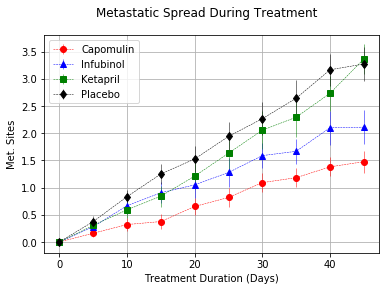

In [21]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

# Put in grid

ax.grid(fillstyle = 'none')

# x-axis is consistent and can be made using arange

x_axis = np.arange(0,50,5)


# Layer the various axes

ax.errorbar(x_axis, capomulin_mean, capomulin_se, fmt="o", linewidth = 0.5, linestyle='dashed',
            color = "red", label = "Capomulin")
ax.errorbar(x_axis, infubinol_mean, infubinol_se, c = "blue", marker = "^", linewidth = 0.5,
            linestyle='dashed', label = "Infubinol")
ax.errorbar(x_axis, ketapril_mean, ketapril_se, c = "green", marker = "s", linewidth = 0.5,
            linestyle='dashed', label = "Ketapril")
ax.errorbar(x_axis, placebo_mean, placebo_se, c = "black", marker = "d", linewidth = 0.5,
            linestyle='dashed', label = "Placebo")


# Setting y limit

ax.set_ylim(-0.2, 3.8)

# Labeling

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
fig.suptitle("Metastatic Spread During Treatment")

ax.legend(loc = "upper left")

# Save the Figure 
plt.savefig("Metastatic Spread During Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_countDF = pd.DataFrame(mergedDF.groupby(["Drug", "Timepoint"])["Mouse ID"].agg(["count"]))
mice_countDF.head()

# Convert to DataFrame

# Grabbing the indices for a new table
s1 = pd.Series(mice_countDF.index.get_level_values('Drug'))
s2 = pd.Series(mice_countDF.index.get_level_values('Timepoint'))

# New table with series attached
mice_countDF = mice_countDF.assign(D=s1.values)
mice_countDF = mice_countDF.assign(TP=s2.values)
 
# Replace index with numerical, rename columns, and re-order them
mice_countDF.reset_index(drop = True, inplace = True)
mice_countDF = mice_countDF[["D", "TP", "count"]]
mice_countDF.rename(columns = {"D": "Drug", "TP": "Timepoint", "count": "Mouse Count"}, inplace = True)

# Preview DataFrame
mice_countDF.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
# Minor Data Munging to Re-Format the Data Frames

# New pivot table
mcDF = pd.pivot_table(mice_countDF, values='Mouse Count', index=['Timepoint'], 
                       columns = ["Drug"], aggfunc="sum")

# Preview the Data Frame
mcDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [24]:
# Survival Rate

# For calculating the percentage of mice who survived, I'm dividing each data point in the array
# by the first value (initial number of mice) in the array and then multiplying by 100 to get a y-axis
# between 0 and 100 instead of between 0 and 1.

# Capomulin

temp = pd.Series(mcDF["Capomulin"])
temp = np.array(temp)
cap_array = temp/temp[0] * 100

# Infubinol

temp = pd.Series(mcDF["Infubinol"])
temp = np.array(temp)
inf_array = temp/temp[0] * 100

# Ketapril

temp = pd.Series(mcDF["Ketapril"])
temp = np.array(temp)
ket_array = temp/temp[0] * 100

# Placebo

temp = pd.Series(mcDF["Placebo"])
temp = np.array(temp)
plac_array = temp/temp[0] * 100


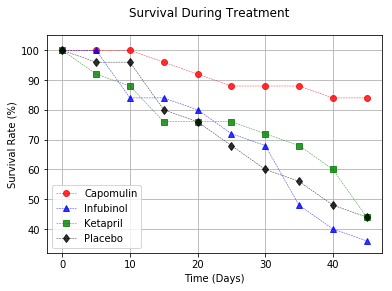

In [25]:
# Generate the Plot 
fig, ax = plt.subplots()

# add grid
ax.grid()

# x axis is our time
x_axis = np.arange(0,50,5)

# y axes will be the different survival rates by drug/placebo

plt.plot(x_axis, cap_array, marker = "o", c = "red", linestyle = "--", lw = 0.5, alpha = 0.8, 
         label = "Capomulin")
plt.plot(x_axis, inf_array, marker = "^", c = "blue", linestyle = "--", lw = 0.5, alpha = 0.8, 
         label = "Infubinol")
plt.plot(x_axis, ket_array, marker = "s", c = "green", linestyle = "--", lw = 0.5, alpha = 0.8, 
         label = "Ketapril")
plt.plot(x_axis, plac_array, marker = "d", c = "black", linestyle = "--", lw = 0.5, alpha = 0.8, 
         label = "Placebo")

# Labeling

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
fig.suptitle("Survival During Treatment")

# Adding the legend

ax.legend(loc = 'lower left')

# Setting the y-axis limit

ax.set_ylim(32, 105)

# Save figure
# plt.savefig("Survival During Treatment.png")

# Show figure

plt.show()

## Summary Bar Graph

In [26]:
# Table of tumor sizes by day and drug

table = pd.pivot_table(mergedDF, values='Tumor Volume (mm3)', index=['Drug'], 
                       columns = ["Timepoint"], aggfunc=np.mean)
table

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.248967,49.101541,51.067318,53.346737,55.504138,58.196374,60.350199,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.527452,49.463844,51.529409,54.067395,56.166123,59.826738,62.440699,65.356386,68.438310


In [27]:
# To calculate the percent changes for each drug, I need to take the avg tumor size on day 45 and divide it by 
# the avg size on day 0, then subtract one from the quotient. I can do this using an ilookup to find the
# row and column in which the 45th and 1st days occur, then dividing. I could have approached this differently 
# by pivoting the table to make the drugs into columns, but I thought I'd try it with rows.
    
pct_chgDF = pd.DataFrame((table.iloc[:, 9]/table.iloc[:,0]) - 1)
pct_chgDF

# Display the data to confirm

,0
Drug,
Capomulin,-0.194753
Ceftamin,0.425165
Infubinol,0.461235
Ketapril,0.570288
Naftisol,0.539233
Placebo,0.512980
Propriva,0.472412
Ramicane,-0.223209
Stelasyn,0.520851


In [28]:
# Making a dataframe of only the values I care about, using loc to find them, then resetting the index
# so that I have a working dataframe where I don't have to do a lookup to find the drug names in the
# next step:

df = pd.DataFrame((pct_chgDF.loc["Capomulin"], pct_chgDF.loc["Infubinol"], pct_chgDF.loc["Ketapril"], 
                    pct_chgDF.loc["Placebo"])).reset_index()

df

,index,0
0,Capomulin,-0.194753
1,Infubinol,0.461235
2,Ketapril,0.570288
3,Placebo,0.512980


In [29]:
# Adding a column to give colors based on value so that I can make the bar plot

df["colors"] = ["red" if x > 0 else "green" for x in df[0]]

# Renaming the columns -- 0 was a particularly confusing column name; as you can see above, it was not a string. 
# It had been timepoint zero in the original table that I made in the first cell after "Summary Bar Graph"

df.rename(columns = {'index': 'drug', 0: 'pct'}, inplace = True)
df

,drug,pct,colors
0,Capomulin,-0.194753,green
1,Infubinol,0.461235,red
2,Ketapril,0.570288,red
3,Placebo,0.512980,red


Text(0,0.5,'Percent Tumor Volume Change')

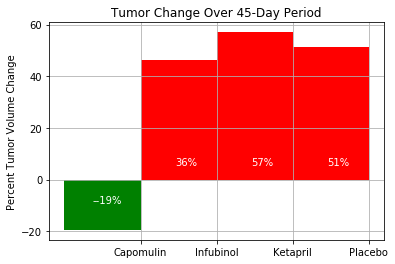

In [30]:
# Making the bar plot using drugs as x value, pct as y value
# I multiplied pct by 100 to make it read correctly on the chart
# To get the ticks to align on the right edge, I've had to make the width negative 

plt.bar(df['drug'], (df['pct'] * 100), color=df["colors"], width=-1, align = "edge")

# Grid 
plt.grid()

# Setting y-axis ticks
plt.yticks(np.arange(-20, 70, 20))

# Putting text on the face -- I need to subtract one from every x-value since it's negatively aligned
# Moreover, "top" is now bottom and "right" is now center in this negative Wonderland.

plt.annotate("--19%", xy=(0, -10), xytext=(-0.25, -10), color='white', ha = "right", va = "bottom")
plt.annotate("36%", xy=(1, 5), xytext=(0.75, 5), color='white', ha = "right", va = "bottom")
plt.annotate("57%", xy=(2, 5), xytext=(1.75, 5), color='white', ha = "right", va = "bottom")
plt.annotate("51%", xy=(3, 5), xytext=(2.75, 5), color='white', ha = "right", va = "bottom")


# Titling and labeling

plt.title("Tumor Change Over 45-Day Period")
plt.ylabel("Percent Tumor Volume Change")


In [31]:
# Show the Figure

plt.show()

# Save the Figure

plt.savefig("Tumor Volume Change.png")

<Figure size 432x288 with 0 Axes>

In [32]:
# Sorting to see which drugs are most effective overall

pct_chgDF.sort_values(by = [0])

,0
Drug,
Ramicane,-0.223209
Capomulin,-0.194753
Ceftamin,0.425165
Infubinol,0.461235
Zoniferol,0.465798
Propriva,0.472412
Placebo,0.512980
Stelasyn,0.520851
Naftisol,0.539233


In [35]:
mergedDF.groupby("Drug")["Mouse ID"].count()


Drug
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     194
Zoniferol    182
Name: Mouse ID, dtype: int64

**Three observable trends based on the data:**

1) Of the three drugs and the placebo tested, Capomulin is far and away the most effective in reducing tumor
    volume and metastatic spread, as well as in survival rate. Based on the tables above, however, I have to 
    wonder why we didn't also check Ramicane, as its efficacy in reducing the tumor volume is greater than 
    Capomulin's. Its survival rate was slightly behind Capomulin's -- 20 mice compared to Ramicane's 21 -- but
    well above the next-highest, Zoniferal, which had only 14 survivors. Capomulin and Ramicane were also 
    tested on the most mice, with 230 and 228 mice tested, respectively. That's 34-36 more mice tested 
    per drug than with any other drug. It would have been interesting to compare their performance
    overall.
    
2) In reduction of tumor volume and, more importantly, in survival rate, Ketapril performs worse than the 
    placebo. This leads me to think that you're better off with no drug at all than with Ketapril.
    
3) Interestingly, Infubinol has the worst survival rate despite beating Ketapril and the placebo in reducing
    tumor volume and the metastatic spread of the tumor. That makes me wonder how strongly the measures of tumor
    volume and metastatic spread correlate to survival. You're better off living with a bigger tumor than
    dying with a smaller one. Of all the drugs charted, Infubinol is our worst performer. Even the placebo 
    outperformed it. The mice were better off with no drug than with Infubinol. 
    
Of the charted drugs, the only one worth taking is Capomulin.